<a href="https://colab.research.google.com/github/19PA1A05B3/COVID-19-K-MEANS-CLUSTERING/blob/master/covid_19_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required packages

In [0]:
import pandas as pd
import numpy as np
import glob # used for the concatenating the different csv files into one DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Details:
***https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports***

* the Data was taken from the above link

***Here I uploaded all the daily reports regarding covid-19, and concatenated all the data into one DataFrame as shown in below***

#1. Combining the entire data in one data frame


* ***First, we gather all the different csv files to all_files***

* ***Then, we concatenate all the csv files using the pandas function pd.concat().***

* ***Later, we load the data into the dataframe df***

* ***Finally, we are creating  one data frame Df by aggregating based on city names.***


In [0]:
path = r'/content' #  path of the different csv files which were uploaded by me
all_files = glob.glob(path + "/*.csv")

In [103]:
df = pd.concat((pd.read_csv(f) for f in all_files))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,67466.0,Mainland China,NaN,2902.0,NaN,2020-03-05T14:53:03,NaN,NaN,30.9756,NaN,112.2707,Hubei,NaN,40592.0
1,NaN,NaN,NaN,6088.0,South Korea,NaN,35.0,NaN,2020-03-05T09:03:09,NaN,NaN,36.0000,NaN,128.0000,NaN,NaN,41.0
2,NaN,NaN,NaN,3858.0,Italy,NaN,148.0,NaN,2020-03-05T17:43:03,NaN,NaN,43.0000,NaN,12.0000,NaN,NaN,414.0
3,NaN,NaN,NaN,3513.0,Iran,NaN,107.0,NaN,2020-03-05T13:43:04,NaN,NaN,32.0000,NaN,53.0000,NaN,NaN,739.0
4,NaN,NaN,NaN,1351.0,Mainland China,NaN,7.0,NaN,2020-03-05T09:23:03,NaN,NaN,23.3417,NaN,113.4244,Guangdong,NaN,1181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,50.0,NaN,Uzbekistan,50.0,NaN,Uzbekistan,0.0,NaN,NaN,2020-03-24 23:37:15,41.377491,NaN,64.585262,NaN,NaN,NaN,0.0
3413,69.0,NaN,Venezuela,84.0,NaN,Venezuela,0.0,NaN,NaN,2020-03-24 23:37:15,6.423800,NaN,-66.589700,NaN,NaN,NaN,15.0
3414,117.0,NaN,Vietnam,134.0,NaN,Vietnam,0.0,NaN,NaN,2020-03-24 23:37:15,14.058324,NaN,108.277199,NaN,NaN,NaN,17.0
3415,3.0,NaN,Zambia,3.0,NaN,Zambia,0.0,NaN,NaN,2020-03-24 23:37:15,-13.133897,NaN,27.849332,NaN,NaN,NaN,0.0


#2.Now we Considered the following features: confirmed, deaths, recovered

*  we created a data frame named Df which contains the features Confirmed, Recovered and Deaths as columns based on the aggregrate city.




In [0]:
Df = pd.DataFrame({'City':df['Province_State'],'Confirmed':df['Confirmed'],'Recovered':df['Recovered'],'Deaths':df['Deaths']})



*  Since, there are some NaN values in our data we removed the rows that contain null values
using dropna().




In [105]:
Df.dropna(axis=0,how='any',inplace=True)
Df

,City,Confirmed,Recovered,Deaths
0,South Carolina,4.0,0.0,0.0
1,Louisiana,8.0,0.0,1.0
2,Virginia,2.0,0.0,0.0
3,Idaho,54.0,0.0,0.0
4,Iowa,1.0,0.0,0.0
...,...,...,...,...
3247,Virgin Islands,17.0,0.0,0.0
3248,Western Australia,175.0,1.0,1.0
3249,Xinjiang,76.0,73.0,3.0
3250,Yunnan,176.0,172.0,2.0


In [106]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22775 entries, 0 to 3251
Data columns (total 4 columns):
City         22775 non-null object
Confirmed    22775 non-null float64
Recovered    22775 non-null float64
Deaths       22775 non-null float64
dtypes: float64(3), object(1)
memory usage: 889.6+ KB


# Now we have to  visualize the data

* For visualizing the data we selected the plots like pairplot and scatter plots

*

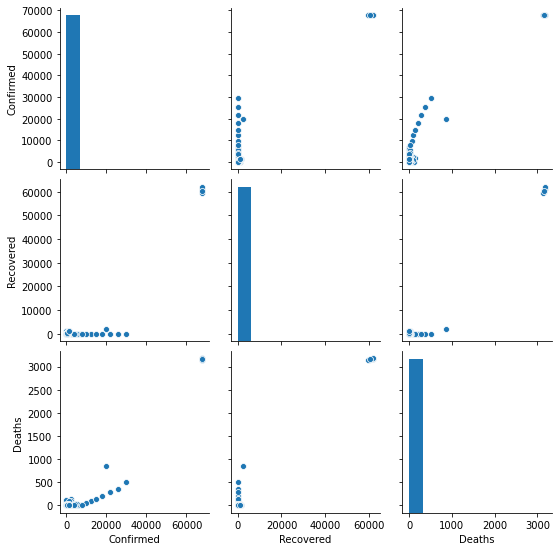

In [107]:
sns.pairplot(Df,kind="scatter")
plt.show()

In [0]:
x=Df.iloc[:,1:4].values

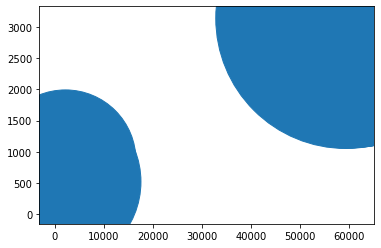

In [109]:
plt.scatter(x[:,1],x[:,2],s=x[:,0]);


*** we can also see the statistical measures of this data***

In [110]:
Df.describe()

,Confirmed,Recovered,Deaths
count,22775.000000,22775.000000,22775.000000
mean,50.172689,23.076048,1.390428
std,1256.001864,1067.164063,56.013733
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000
max,67801.000000,62098.000000,3177.000000


# Now we have to Tune K by starting from 2 and going till 20 to select best k.

* we have to observe what's going on by changing the value of k from 2 to 20 to select best k.

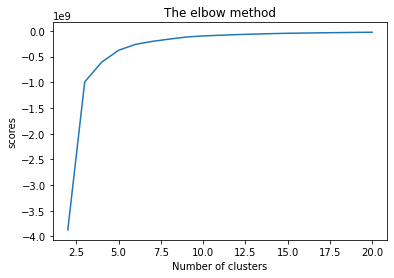

In [111]:
list = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    list.append(kmeans.score(x))
plt.plot(range(2,21),list)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.show()

# By tuning the vaue of k from 2 to 20  we see an elbow pattern as shown in above plot.

***By observing the above elbow pattern we can select the value of k = 3. since there is a bend at 3 there are not big changes occured after the value of k=3.***

***For each record the total error is shown below:***

In [112]:
list

[-3873149139.7535267,
 -991963207.5587885,
 -608345145.2710516,
 -376913280.098322,
 -260934638.688699,
 -202645382.69401234,
 -158600213.66291046,
 -118250928.40245293,
 -96264837.94140863,
 -83533526.7588777,
 -70797432.0478222,
 -61078095.290862456,
 -52234090.29086246,
 -45071201.42164078,
 -40485580.42164078,
 -36062376.11723805,
 -32209681.47554976,
 -28013115.856496874,
 -24967366.65678867]

In [113]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)


[0 0 0 ... 0 0 0]


#Now Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers which are 3 as we selected this value by observing the elbow pattern
* Clustering Analysis on Deaths and Recovered.

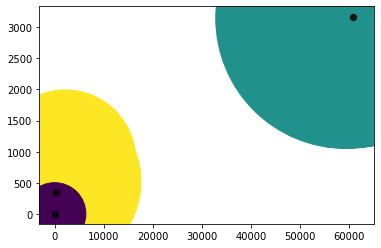

In [114]:
plt.scatter(x[:, 1], x[:, 2], c=y_kmeans, s=x[:,0],cmap="viridis")
cen=kmeans.cluster_centers_
plt.scatter(cen[:,1],cen[:,2],c="black",s=40,alpha=0.8);

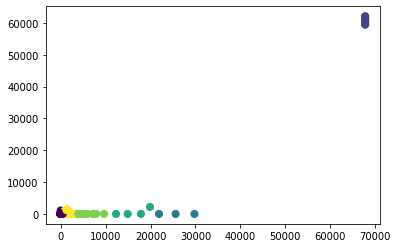

In [115]:
labels = KMeans(6, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis');

*** Now we can see the centroids i.e; where are they after doing all this ***

In [116]:
centroids=kmeans.cluster_centers_
centroids

array([[2.31060586e+01, 4.30016256e+00, 3.10794781e-01],
       [6.78007143e+04, 6.07830000e+04, 3.16285714e+03],
       [2.03087143e+04, 3.14285714e+02, 3.50428571e+02]])

# *INVADERS* TEAM MEMBERS DETAILS:

***19PA1A05B3 - M.H.S.S.GANESH BABU - CSE-B***

***19PA1A0598 - M.REVANTH - CSE-B***

***19PA1A0565 - K.LOHIT - CSE-B***

***19PA1A05C8 - N.BALA CHANDU PRAKASH - CSE-B***